<h1><center><font size="6">Preaugmentation Notebook</font></center></h1>

# Contents

- <a href='#1'>Importing Packages</a>  
- <a href='#2'>Baseline Densely Connected Network</a>
- <a href='#3'>Densely Connected Network</a> 
- <a href='#4'>Basic CNN Model</a>    



# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm.notebook import tqdm

import warnings
warnings.simplefilter("ignore")

import tensorflow as tf
from keras import models, layers, regularizers, optimizers
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16


# Baseline Densely Connected Network

In [12]:
# generate datasets for training, validation, and testing
train_fldr = "../split/train_imb"
val_fldr = "../split/val"
test_fldr = "../split/test"

tr_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_fldr, 
                                                                 target_size = (224, 224),
                                                                 batch_size = 16)
val_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_fldr, 
                                                                  target_size = (224, 224),
                                                                  batch_size = 16)
tt_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_fldr,
                                                                 target_size = (224, 224),
                                                                 batch_size = 16)


Found 26500 images belonging to 2 classes.
Found 6626 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
X_tr, y_tr = next(tr_generator)
X_val, y_val = next(val_generator)
X_tt, y_tt = next(tt_generator)

In [14]:
m_train = X_tr.shape[0]
num_px = X_tr.shape[1]
m_val = X_val.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(X_tr.shape))
print ("train_labels shape: " + str(y_tr.shape))
print ("val_images shape: " + str(X_val.shape))
print ("val_labels shape: " + str(y_val.shape))

Number of training samples: 16
Number of validation samples: 16
train_images shape: (16, 224, 224, 3)
train_labels shape: (16, 2)
val_images shape: (16, 224, 224, 3)
val_labels shape: (16, 2)


In [15]:
X_tr = X_tr.reshape(X_tr.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print(X_tr.shape)
print(X_val.shape)

(16, 150528)
(16, 150528)


In [20]:
y_tr = np.reshape(y_tr[:,0], (16, 1))
y_val = np.reshape(y_val[:,0], (16, 1))

print(y_tr.shape)
print(y_val.shape)

(16, 1)
(16, 1)


# Densely Connected Network

In [23]:
model = models.Sequential()
model.add(layers.Dense(20, activation = 'relu', input_shape = (150528, ))) # 2 hidden layers
model.add(layers.Dense(7, activation = 'relu'))
model.add(layers.Dense(5, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [24]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 0.01),
              metrics = ['accuracy', tf.metrics.Precision(), tf.metrics.Recall(), tf.metrics.AUC(), tf.metrics.AUC(curve='PR')])

history = model.fit(X_tr,
                   y_tr,
                   epochs = 100,
                   batch_size = 16,
                   validation_data = (X_val, y_val))

val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_auc_3: 0.0000e+00
Epoch 43/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_auc_3: 0.0000e+00
Epoch 44/100
1/1 [==============================] - 0s 76ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_auc_3: 0.0000e+00
Epoch 45/100
1/1 [==============================] - 0s 62ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e

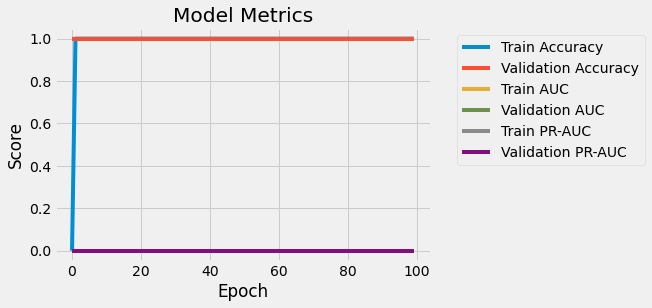

In [25]:
# create visualization for metrics
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['auc_2'])
plt.plot(history.history['val_auc_2'])
plt.plot(history.history['auc_3'])
plt.plot(history.history['val_auc_3'])
plt.title('Model Metrics')
plt.ylabel('Score')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train AUC', 'Validation AUC', 'Train PR-AUC', 'Validation PR-AUC'], loc='best', bbox_to_anchor=(1.05, 1))
plt.show()

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                3010580   
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 3,010,773
Trainable params: 3,010,773
Non-trainable params: 0
_________________________________________________________________


In [28]:
results_train = model.evaluate(X_tr, y_tr)

1/1 [==============================] - 1s 581ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00


In [31]:
results_val = model.evaluate(X_val, y_val)

1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00


In [25]:
results_train

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [26]:
results_val

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

# Basic CNN

In [ ]:
# generate datasets through ImageDataGenerator
train_fldr = "../split/train_imb"
val_fldr = "../split/val"
test_fldr = "../split/test"

tr_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_fldr, 
                                                                 target_size = (224, 224),
                                                                 batch_size = 16)
val_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_fldr, 
                                                                  target_size = (224, 224),
                                                                  batch_size = 16)
tt_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_fldr,
                                                                 target_size = (224, 224),
                                                                 batch_size = 16)


In [27]:
# create model
def define_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation = 'relu', padding='same'),   
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu').,
        Dense(1, activation='sigmoid')
    ])
    return model

model = define_model()

# compile model
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(lr = 0.01),
              metrics = ['accuracy', Precision(), Recall(), AUC(), AUC(curve='PR')] 


In [29]:
# train model
history2 = model.fit(X_tr,
                    y_tr,
                    epochs = 50,
                    validation_data = (val_images, val_y))

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_auc_3: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_auc_3: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_2: 0.0000e+00 - val_a

In [30]:
# evaluate model
results_train = model.evaluate(train_images, train_y)

1/1 [==============================] - 0s 307ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00


In [31]:
# evaluate model
results_val = model.evaluate(val_images, val_y)

1/1 [==============================] - 0s 312ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_2: 0.0000e+00 - auc_3: 0.0000e+00


In [32]:
results_train

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
results_val

[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

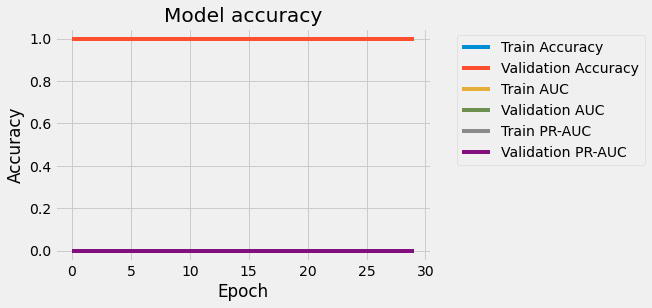

In [34]:
# visualization of metris
plt.style.use('fivethirtyeight')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['auc_2'])
plt.plot(history.history['val_auc_2'])
plt.plot(history.history['auc_3'])
plt.plot(history.history['val_auc_3'])
plt.plot
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Validation Accuracy', 'Train AUC', 'Validation AUC', 'Train PR-AUC', 'Validation PR-AUC'], loc='best', bbox_to_anchor=(1.05, 1))
plt.show()